In [1]:
import innvestigate

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import losses
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
import matplotlib.pyplot as plt
import time

In [4]:
#training iterations
epochs = 2
batch_size = 50
learning_rate = 1e-4
keep_prob = 0.5
input_shape = (28,28,1)

In [5]:
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
X_train = data.train.images.reshape((-1,28,28,1))
Y_train = data.train.labels
X_test = data.test.images.reshape((-1,28,28,1))
Y_test = data.test.labels

In [7]:
print("Training set shape:", X_train.shape)
print("Training set labels shape:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test set labels shape:", Y_test.shape)

Training set shape: (55000, 28, 28, 1)
Training set labels shape: (55000, 10)
Test set shape: (10000, 28, 28, 1)
Test set labels shape: (10000, 10)


In [8]:
def create_model(input_shape, keep_prob, use_soft):
    X_input = Input(input_shape);
    X = Conv2D(32, (5,5), strides = (1,1), padding = "same", name = "Z_1")(X_input);
    X = Activation('relu')(X);
    X = MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "same", name = "max_pool_1")(X);
    X = Conv2D(64, (5,5), strides = (1,1), padding = "same", name = "Z_2")(X);
    X = Activation('relu')(X);
    X = MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "same", name = "max_pool_2")(X);
    X = Flatten()(X);
    X = Dense(1024, activation = "relu", name = "A_3")(X)
    X = Dropout(keep_prob)(X)
    if use_soft:
        X = Dense(10, activation = "softmax", name = "A_4")(X)
    else:
        X = Dense(10, activation = "linear", name = "Z_4")(X)
    model = Model(inputs = X_input, outputs = X)
    return model

In [9]:
model = create_model(input_shape, keep_prob, False);
modelp = create_model(input_shape, keep_prob, True);

In [10]:
modelp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
modelp.fit(x = X_train, y = Y_train, epochs = 2, batch_size = 50)

Epoch 1/2
55000/55000 [==============================] - 102s 2ms/step - loss: 0.1275 - acc: 0.9607
Epoch 2/2
55000/55000 [==============================] - 100s 2ms/step - loss: 0.0447 - acc: 0.9861


In [12]:
train_loss, train_metric = modelp.evaluate(x = X_train, y = Y_train)

55000/55000 [==============================] - 23s 418us/step


In [13]:
train_metric

0.9946181818181818

In [14]:
train_loss

0.017597332824110478

In [15]:
test_loss, test_metric = modelp.evaluate(x = X_test, y = Y_test)

10000/10000 [==============================] - 4s 430us/step


In [16]:
test_loss

0.024934701010207935

In [17]:
test_metric

0.9909

In [18]:
model.set_weights(modelp.get_weights())

In [19]:
analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1_IB", model)

In [20]:
start = time.time()
analysis = analyzer.analyze(X_train[0:50,:,:,:])
end = time.time()
print((end-start)/50)

0.011480283737182618


In [21]:
analysis.shape

(50, 28, 28, 1)

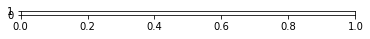

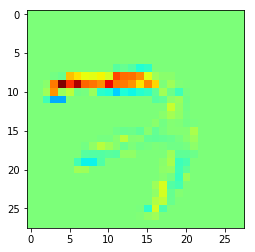

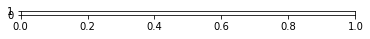

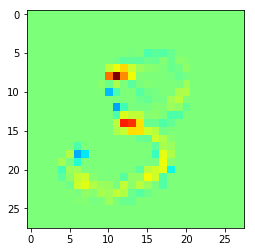

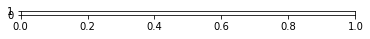

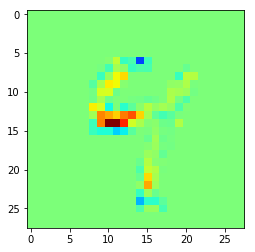

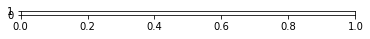

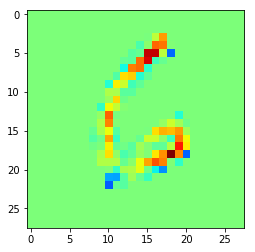

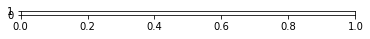

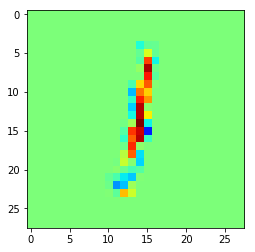

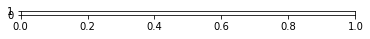

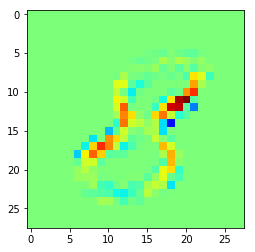

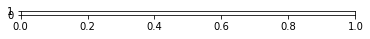

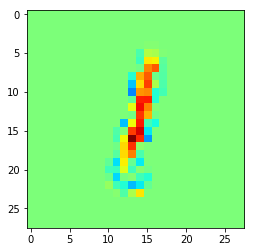

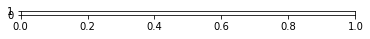

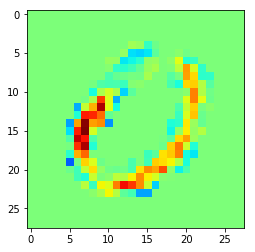

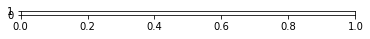

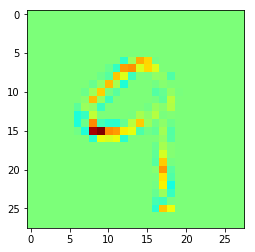

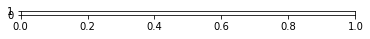

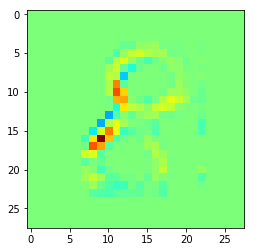

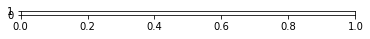

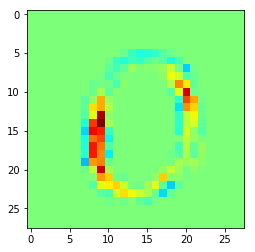

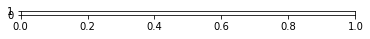

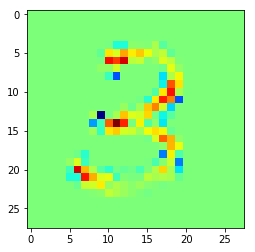

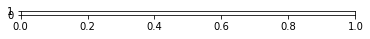

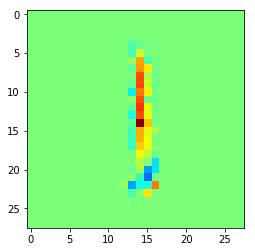

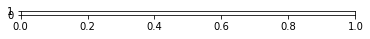

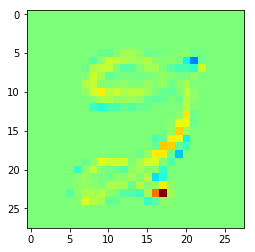

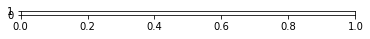

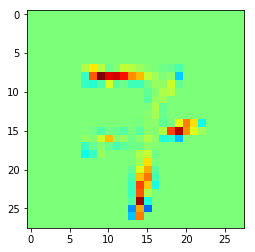

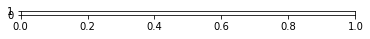

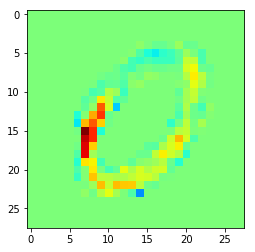

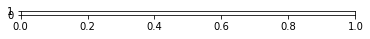

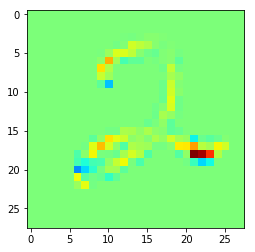

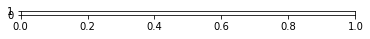

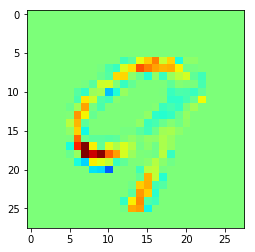

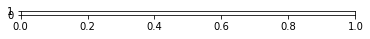

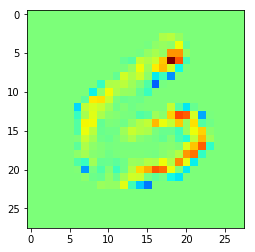

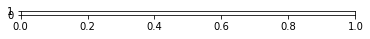

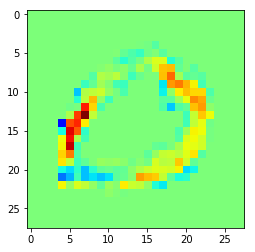

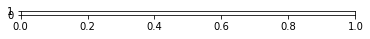

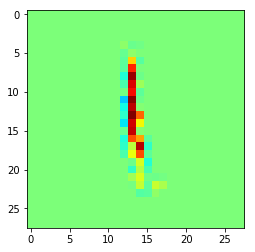

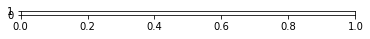

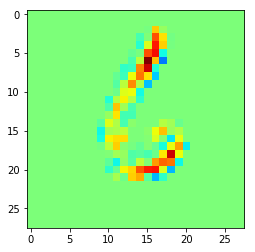

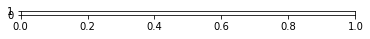

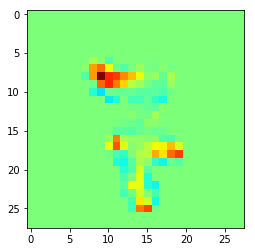

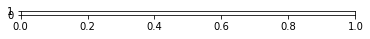

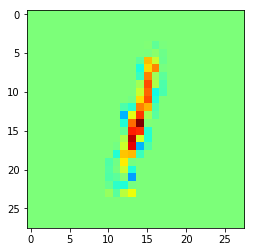

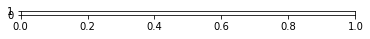

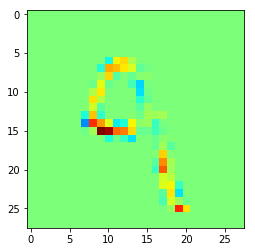

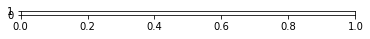

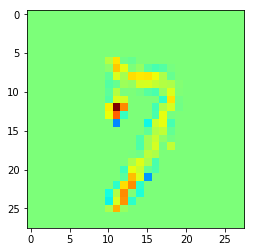

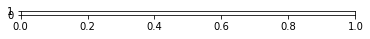

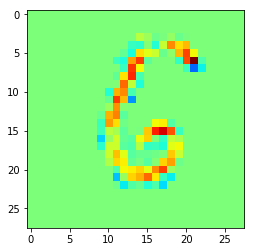

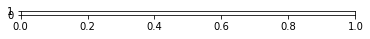

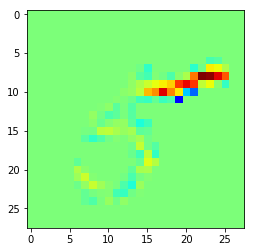

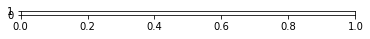

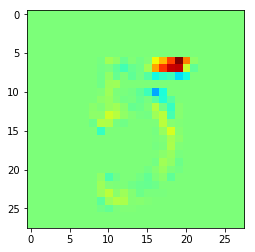

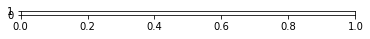

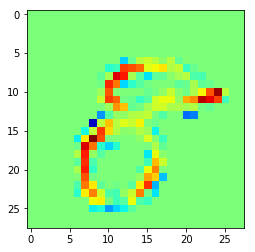

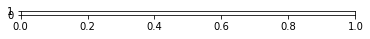

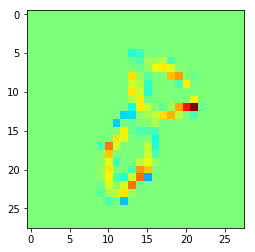

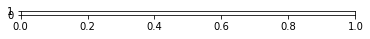

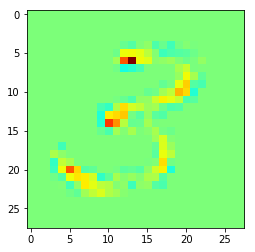

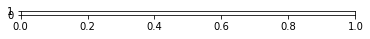

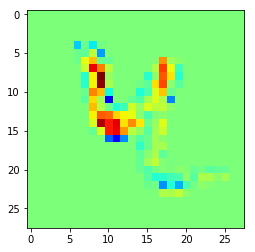

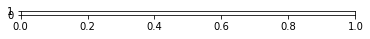

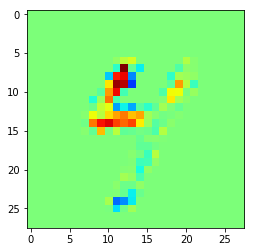

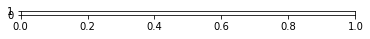

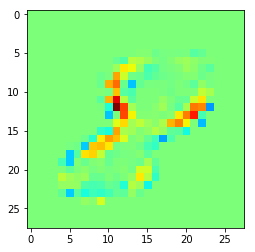

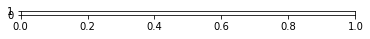

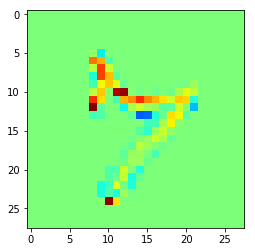

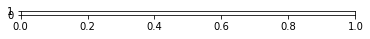

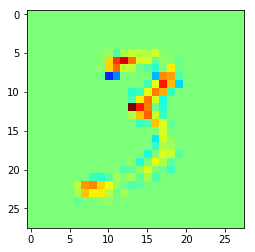

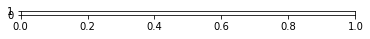

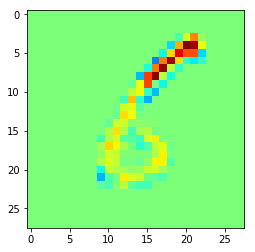

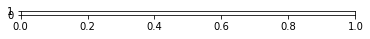

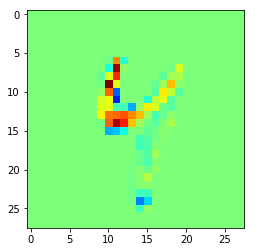

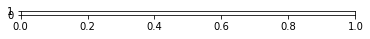

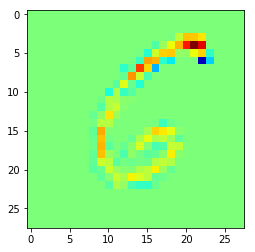

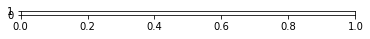

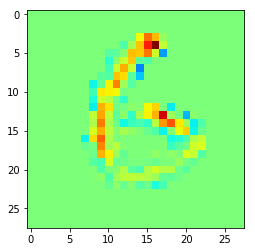

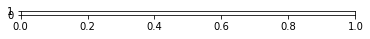

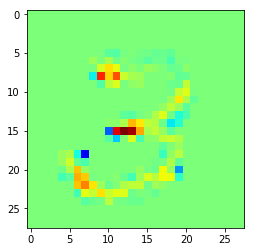

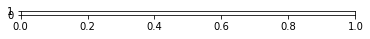

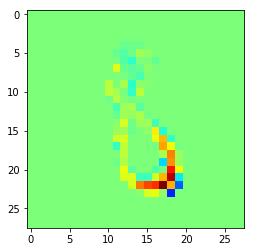

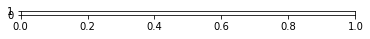

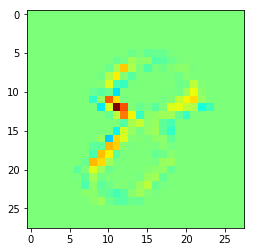

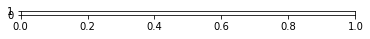

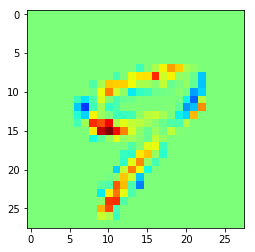

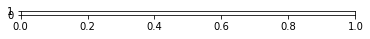

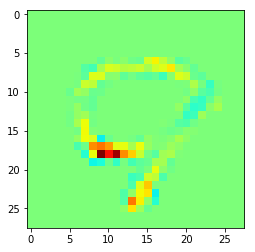

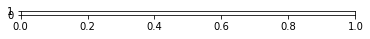

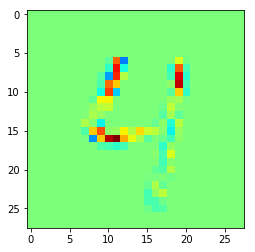

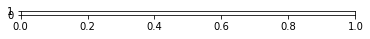

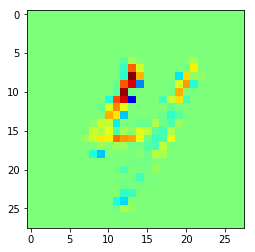

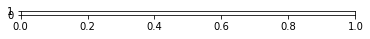

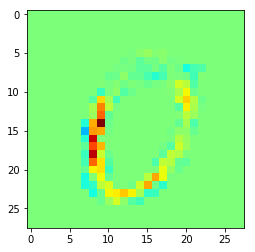

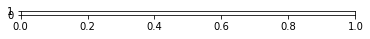

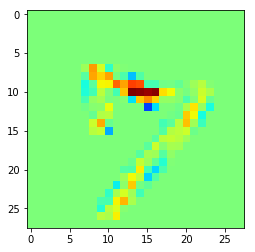

In [22]:
for i in range(50):
    plt.subplot(50,1,i+1)
    plt.figure(figsize=(4,4))
    m = np.max(np.abs(analysis[i,:,:,0]))
    a = ((analysis[i,:,:,0]/m)+1)/2
    plt.imshow(a, vmax = 1, vmin = 0, cmap = "jet")
    plt.show()

In [23]:
np.save("Model Weights/Conv1-W", model.get_weights()[0])
np.save("Model Weights/Conv1-B", model.get_weights()[1])
np.save("Model Weights/Conv2-W", model.get_weights()[2])
np.save("Model Weights/Conv2-B", model.get_weights()[3])
np.save("Model Weights/FC1-W", model.get_weights()[4])
np.save("Model Weights/FC1-B", model.get_weights()[5])
np.save("Model Weights/FC2-W", model.get_weights()[6])
np.save("Model Weights/FC2-B", model.get_weights()[7])